# Identifying Malignant Tumors to detect presence of breast cancer
Data obtained from kaggle and can be found [here](https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Introduction 🌟🔍
- **Writeup from kaggle:**

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates. Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the [University of Wisconsin Hospitals](https://www.uwhealth.org), Madison from Dr. William H. Wolberg.

- **Goals**
1) Develop a machine learning model to accurately classify tumors as malignant or benign.
2) Achieve high accuracy in distinguishing between malignant and benign tumors.
3) Minimize false positives and false negatives
4) Strive for a balanced performance in terms of precision, recall, and F1 score.

In [2]:
df = pd.read_csv('./Data/Breast_cancer_data.csv', )
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## Data Understanding 📊🔍
- Data cleaning and preprocessing
- Data visualization and exploration (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df.diagnosis.value_counts() ## roughly 37% benign 63% malignant

diagnosis
1    357
0    212
Name: count, dtype: int64

Here is a brief description for the columns:

| Column Name      | Description                                                                                     |
|------------------|-------------------------------------------------------------------------------------------------|
| **diagnosis**        | Diagnosis of breast tissues (1 = malignant, 0 = benign) where malignant denotes a harmful disease|
| **mean_radius**      | Mean of distances from center to points on the perimeter                                        |
| **mean_texture**     | Standard deviation of gray-scale values                                                        |
| **mean_perimeter**   | Mean size of the core tumor                                                                    |
| **mean_area**        | Mean area of the core tumor                                                                    |
| **mean_smoothness**  | Mean of local variation in radius lengths                                                      |

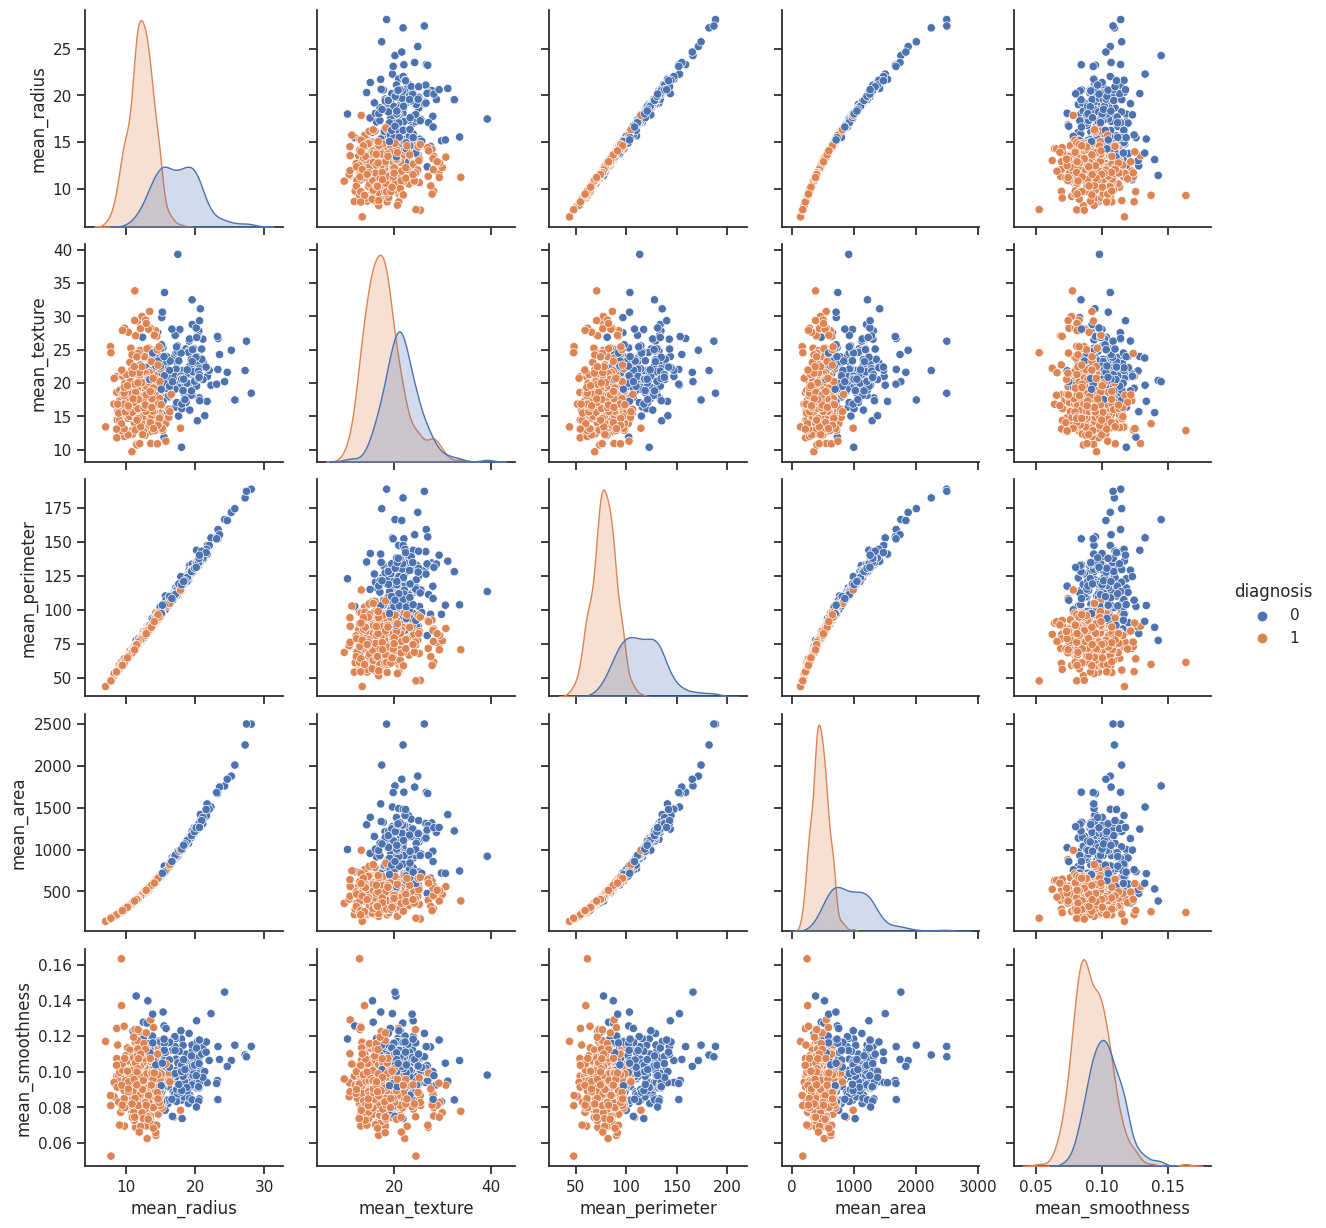

In [5]:
sns.set(style="ticks")
sns.pairplot(df, hue="diagnosis")
plt.show()

In the diagonal we see the distributions of radius, texture, perimeter, area, and smoothness color coded by diagnosis (orange for malignant(BAD)). For all these parameters, malignant classified parameters have a higher peaks of lower mode (peaks to the left of benign tumors).

### Linear
**perimeter vs radius** seems to have a linear relationship, which sorta makes sense. 

From chatgpt:  <br>
`Regarding the linear relationship between perimeter and radius, it intuitively makes sense because the perimeter of a circle is directly proportional to its radius. Mathematically, the relationship between perimeter (P) and radius (r) of a circle can be expressed as P = 2πr, where π is a constant. This equation represents a linear relationship between the two variables. `

### Polynomial
**area vs radius/perimeter seems to have a polynomial relationship**, which also makes sense because they're kind of "quadratically related"

chatgpt:<br>
`On the other hand, the polynomial relationship between area and radius/perimeter also aligns with our understanding. The area of a circle is given by the formula A = πr^2, which shows a quadratic relationship with the radius. Similarly, the relationship between area and perimeter can also exhibit polynomial behavior.`

### No relationship
The rest of the pairplots show no obvious relationships. However, it is worth noting that we get different qualities of separation:

Good  
- radius vs smoothness
- area vs smoothness
- area vs texture
- perimeter vs texture

Medium  
- texture vs radius

Bad  
- texture vs smoothness

## Data Preparation/Cleaning🛠️🔧
- Feature selection and engineering
- Handling missing values and outliers
- Data normalization or scaling

As seen below, there are no missing values in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


All the columns contain continous numerical values, we shall scale and normalise them.

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_norm = df.copy()

columns_to_adjust = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
scaler = StandardScaler() 
df_norm[columns_to_adjust] = scaler.fit_transform(df_norm[columns_to_adjust])

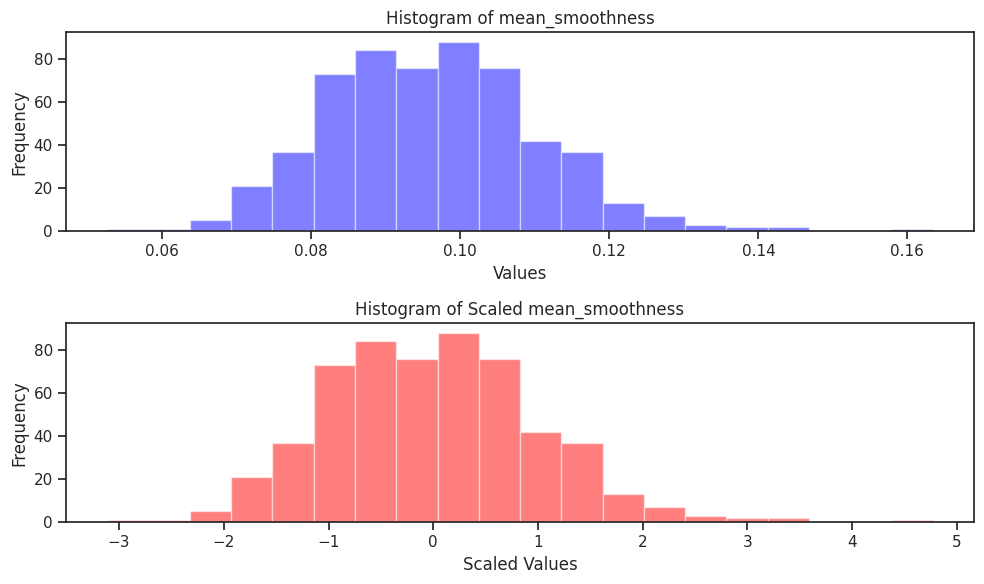

In [19]:
column_to_compare = 'mean_smoothness'
original_values = df[column_to_compare]
scaled_values = df_norm[column_to_compare]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(original_values, bins=20, color='blue', alpha=0.5)
plt.title('Histogram of {}'.format(column_to_compare))
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(scaled_values, bins=20, color='red', alpha=0.5)
plt.title('Histogram of Scaled {}'.format(column_to_compare))
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
print(df_norm.mean_radius.mean())
df_norm.mean_radius.var()

-1.3736327053358703e-16


1.0017605633802817

In [25]:
df_norm.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,0
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,0
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,0
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,0


When MI is 0, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

From MI we can see that the size of the tumor carries more information than texture and smoothness.

In [26]:
from sklearn.feature_selection import mutual_info_regression

# Getting Mutual Information Scores
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

y = df_norm.diagnosis
X = df_norm.drop("diagnosis", axis=1)
make_mi_scores(X, y).head()

mean_perimeter     0.402251
mean_radius        0.366267
mean_area          0.362967
mean_texture       0.096009
mean_smoothness    0.082179
Name: MI Scores, dtype: float64

We can also tell that radius, area, and perimeter are very dependent.

In [29]:
make_mi_scores(X, df_norm['mean_radius'])

mean_radius        4.986327
mean_area          3.632602
mean_perimeter     2.837844
mean_texture       0.057642
mean_smoothness    0.035524
Name: MI Scores, dtype: float64

While smoothness and texture are relatively independent variables

In [30]:
make_mi_scores(X, df_norm['mean_smoothness'])

mean_smoothness    5.018736
mean_perimeter     0.075612
mean_area          0.044102
mean_radius        0.037880
mean_texture       0.000000
Name: MI Scores, dtype: float64

## Model Development 💡💻
- Split the dataset into training and testing sets
- Select an appropriate machine learning algorithm
- Train the model on the training set
- Model evaluation on the testing set

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_auc = roc_auc_score(y_test, logreg_preds)

svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_auc = roc_auc_score(y_test, svm_preds)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_preds)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression AUC:", logreg_auc)

print("SVM Accuracy:", svm_accuracy)
print("SVM AUC:", svm_auc)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest AUC:", rf_auc)

Logistic Regression Accuracy: 0.9385964912280702
Logistic Regression AUC: 0.932361611529643
SVM Accuracy: 0.9473684210526315
SVM AUC: 0.9439895185063871
Random Forest Accuracy: 0.9473684210526315
Random Forest AUC: 0.9485751719620047


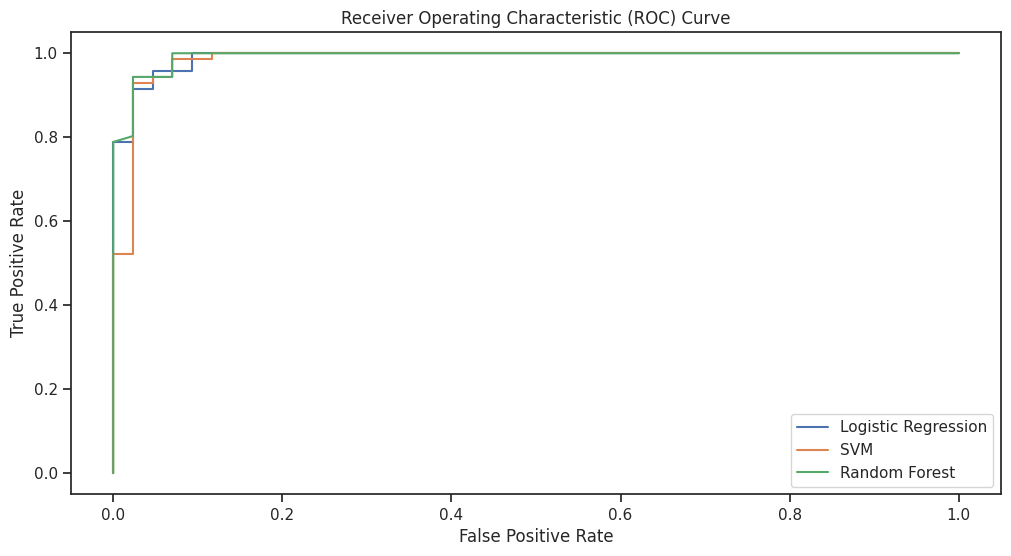

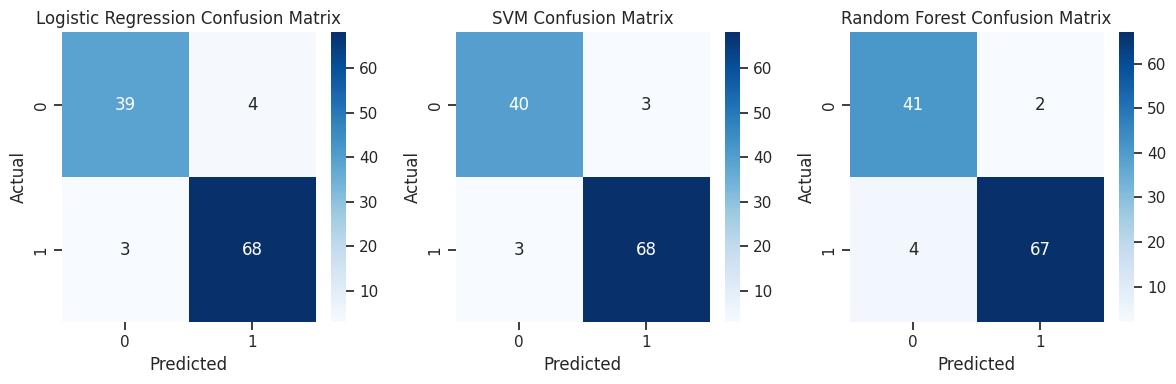

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix

# Define a function to plot ROC curve
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

# ROC curves
plt.figure(figsize=(12, 6))

# Logistic Regression
logreg_scores = logreg.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, logreg_scores, label='Logistic Regression')

# SVM
svm_scores = svm.decision_function(X_test)
plot_roc_curve(y_test, svm_scores, label='SVM')

# Random Forest
rf_scores = rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, rf_scores, label='Random Forest')

plt.show()

# Confusion matrices
plt.figure(figsize=(12, 4))

# Logistic Regression
plt.subplot(1, 3, 1)
logreg_cm = confusion_matrix(y_test, logreg_preds)
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# SVM
plt.subplot(1, 3, 2)
svm_cm = confusion_matrix(y_test, svm_preds)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest
plt.subplot(1, 3, 3)
rf_cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Random Forest provides feature importances that provides information about the importance of each feature in the prediction process. We can see that no one feature was unimportant and perimeter was deemed the most important feature.

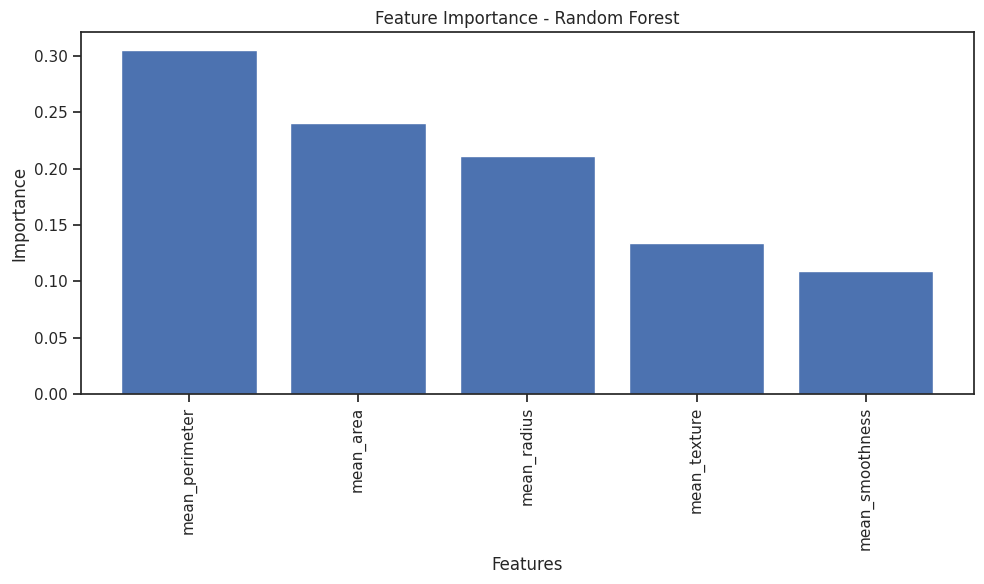

In [34]:
importances = rf.feature_importances_

# Feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names based on the sorted indices
sorted_features = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [47]:
import pickle
import os

save_directory = "models"

with open(os.path.join(save_directory, "rf_model.pkl"), "wb") as file:
    pickle.dump(rf, file)

In [49]:
with open(os.path.join(save_directory, "logreg_model.pkl"), "wb") as file:
    pickle.dump(logreg, file)

In [46]:
import joblib

save_directory = "models"

# Save the model
joblib.dump(rf, os.path.join(save_directory, "rf_model.joblib"))

['models/rf_model.joblib']

## Conclusion 📝🌟
#### Limitations and future directions
The dataset is relatively small and simple, and may not capture all the nuances needed to make truly significant predictions. However, even with this limitation the models are able to make sense and give predictions high in accuracy and ROC-AUC.